In [1]:
import matplotlib.pyplot as plt

import pandas as pd

In [7]:
df = pd.read_csv('dpt2016.txt', sep='\t')

In [5]:
df.sample(3)

,sexe,preusuel,annais,dpt,nombre
328843,1,DANY,1983,61,3
1524777,1,VICTOR,1981,25,3
604040,1,GRÉGOIRE,1932,62,4


In [36]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3520641 entries, 0 to 3520640
Data columns (total 5 columns):
sexe        3520641 non-null int64
preusuel    3520640 non-null object
annais      3520641 non-null object
dpt         3520641 non-null object
nombre      3520641 non-null int64
dtypes: int64(2), object(3)
memory usage: 134.3+ MB


In [41]:
c = df['preusuel'].isnull()
df.loc[c]

,sexe,preusuel,annais,dpt,nombre
3075793,2,NaN,XXXX,XX,30


In [37]:
# sexe
df['sexe'].value_counts()

2    1893714
1    1626927
Name: sexe, dtype: int64

In [38]:
# preusuel
df['preusuel'].value_counts().head()

_PRENOMS_RARES    21239
CAMILLE           13118
MARIE             13047
PIERRE            11143
CLAUDE            10582
Name: preusuel, dtype: int64

In [39]:
# annais
df['annais'].value_counts().head()

2010    54906
2011    54158
2012    54157
2014    53637
2013    53563
Name: annais, dtype: int64

In [40]:
# dpt
df['dpt'].value_counts().head()

75    118895
59     97052
69     74497
13     73060
62     64553
Name: dpt, dtype: int64

In [42]:
# Années qui ne sont pas des chaines de 4 chiffres
c = df['annais'].str.contains('^[0-9]{4}$')
(~c).sum()

33910

In [43]:
df.loc[~c].head()

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,28
1,1,AADAM,XXXX,XX,20
2,1,AADEL,XXXX,XX,54
5,1,AADIL,XXXX,XX,167
6,1,AAKASH,XXXX,XX,24


# Filtrage

In [44]:
c = (df['preusuel'] != '_PRENOMS_RARES')
df = df.loc[c]

In [46]:
c = ~df['annais'].str.contains('X')
df = df.loc[c]

In [47]:
c = ~df['dpt'].str.contains('X')
df = df.loc[c]

Est-ce que tous les départements contiennent bien 2 ou 3 chiffres ?

In [50]:
c = (df['dpt'].str.contains('^[0-9]{2,3}$'))
c.all()

True

In [60]:
df['annais'] = df['annais'].astype(int)

# Fréquence de votre prénom

En quelle année votre prénom a-t-il été le plus donné ?

In [61]:
def filtre_prenom(df, prenom):
    c = (df['preusuel'] == prenom.upper())
    return df.loc[c]

def somme_france(df, prenom):
    df = filtre_prenom(df, prenom)
    
    return df.groupby('annais')['nombre'].sum()

def annee_max(df, prenom):
    s = somme_france(df, prenom)
    
    return s.idxmax()

annee_max(df, 'Jordan')

1993

# Courbe par année

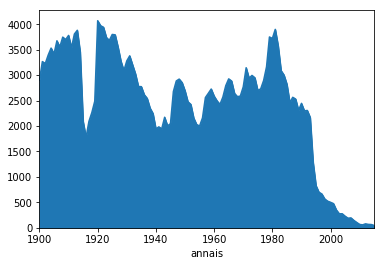

In [150]:
somme_france(df, 'Hélène').reindex(range(1900, 2016)).plot.area()

plt.show()

# Caractère éphémère des prénoms

In [144]:
dft = df.groupby(['preusuel', 'annais'])['nombre'].sum()

In [145]:
c = (dft > 1000)
dft = dft.loc[c]

In [146]:
# Nombre de fois maximum où un prénom a été donné
max_par_an = dft.reset_index().groupby('preusuel')['nombre'].max()

In [147]:
dft = dft.unstack('annais')
dft['max'] = 0.5 * max_par_an

for c in dft.columns:
    if c == 'max':
        continue
    dft[c] = (dft[c] >= dft['max'])

del dft['max']

dft = dft.sum(axis='columns').sort_values(ascending=False)

In [149]:
print(dft.head(10))
print(dft.tail(10))

preusuel
HÉLÈNE      87
FRANÇOIS    80
ANNE        77
ELISE       62
JULIETTE    51
LUCIE       51
PIERRE      49
ALICE       46
SAMUEL      45
VICTOR      43
dtype: int64
preusuel
PRISCILLA    1
ISAAC        1
FÉLIX        1
LOUKA        1
RUDY         1
FRANCE       1
THÉA         1
JORDY        1
RENAUD       1
LUKAS        1
dtype: int64
